# Test: case0-0-transistor-bent_lead
['train/bent_lead', 'train/good']
['test/bent_lead', 'test/good', 'test/misplaced', 'test/damaged_case', 'test/cut_lead']

# Test: case0-1-transistor-cut_lead
['train/good', 'train/cut_lead']
['test/bent_lead', 'test/good', 'test/misplaced', 'test/damaged_case', 'test/cut_lead']

# Test: case0-2-transistor-damaged_case
['train/good', 'train/damaged_case']
['test/bent_lead', 'test/good', 'test/misplaced', 'test/damaged_case', 'test/cut_lead']

# Test: case0-3-transistor-misplaced
['train/good', 'train/misplaced']
['test/bent_lead', 'test/good', 'test/misplaced', 'test/damaged_case', 'test/cut_lead']



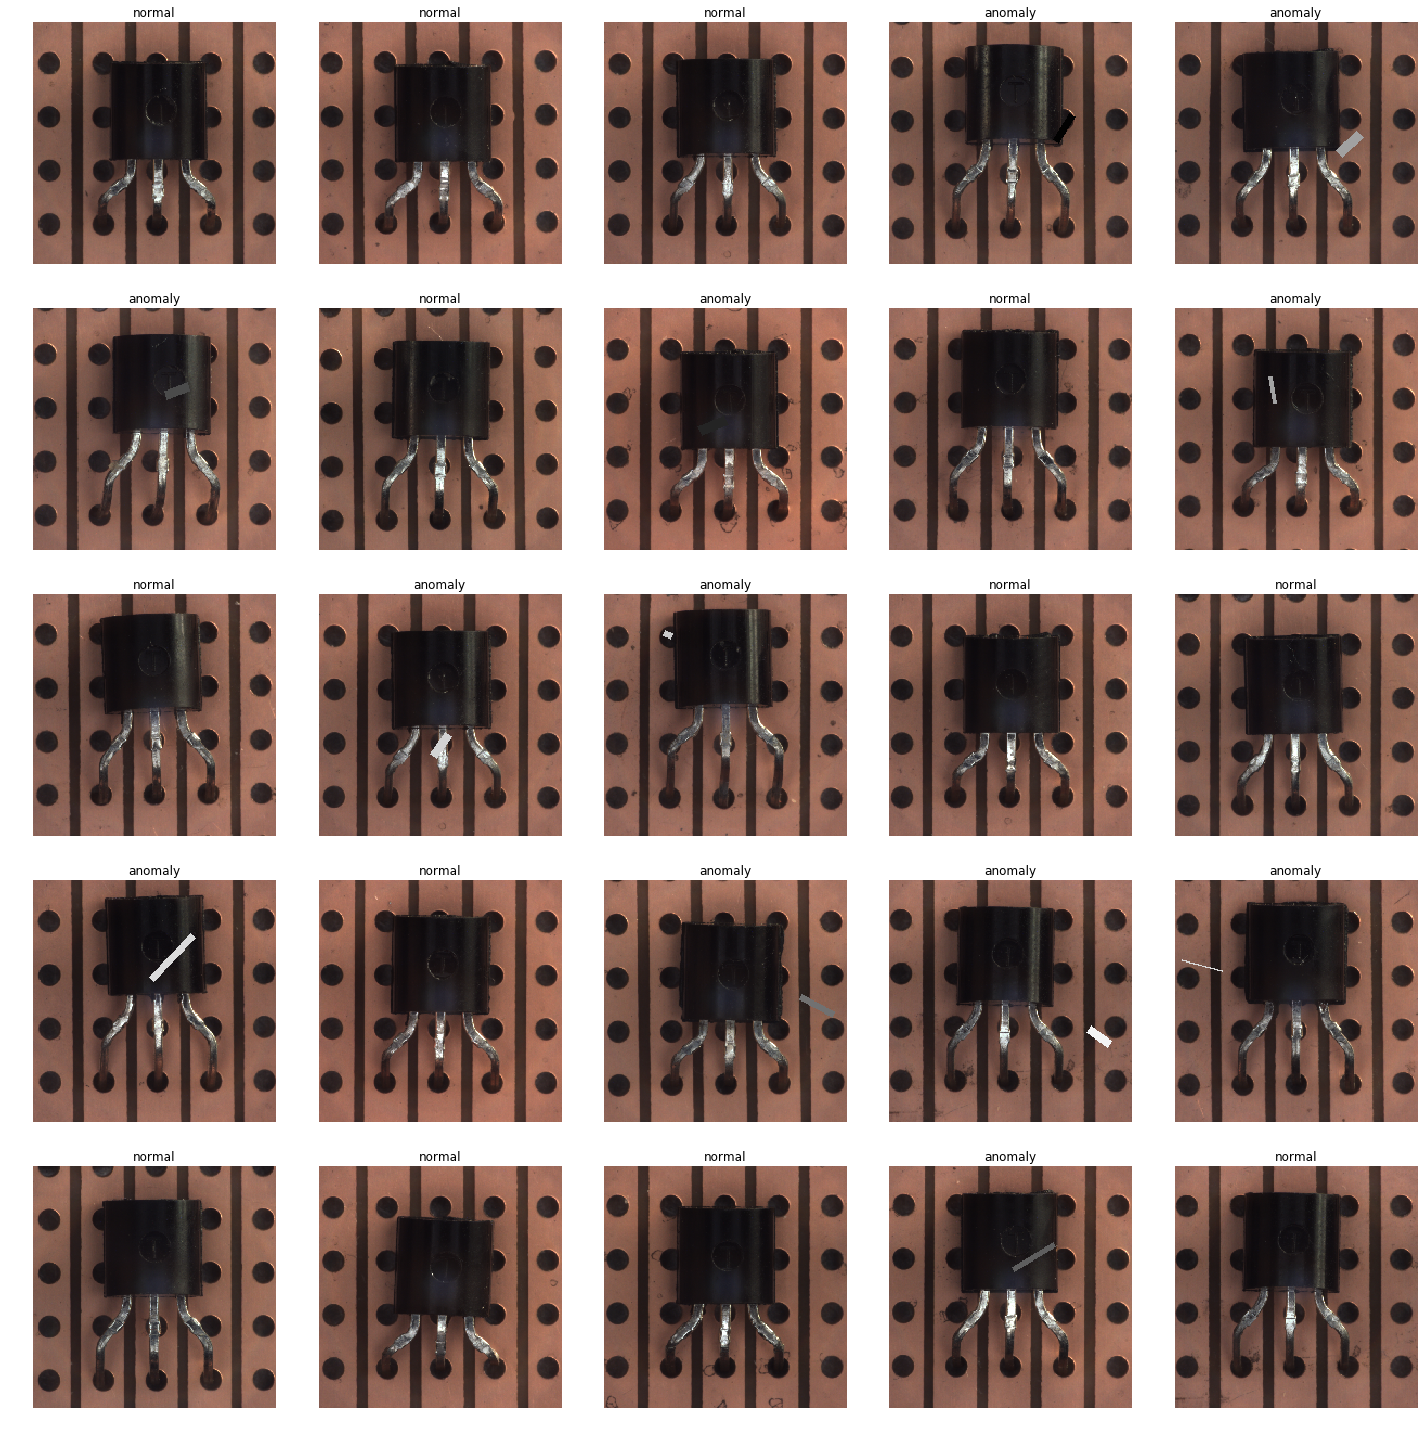

In [2]:
#! wget https://raw.githubusercontent.com/ronghuaiyang/arcface-pytorch/master/models/metrics.py
#! wget https://raw.githubusercontent.com/KaiyangZhou/pytorch-center-loss/master/center_loss.py
from mvtecad_test import *
from fastai.callbacks import SaveModelCallback

fastai_progress_as_text()

PATH = Path('/mnt/dataset/mvtec_ad')

mvtecad = MVTecADTest(PATH, artificial_image_list_cls=DefectOnBlobImageList,
                      testcases = ['transistor',], skip_data_creation=True)
DefectOnBlobImageList.set_params(width_min=1, width_max=10, length=40, color=False)
mvtecad.set_test(0, 0)
data = mvtecad.databunch()
data.show_batch()

In [ ]:
def learner_ArcFace(data):
    learn = cnn_learner(data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, data, ArcMarginProduct, m=0.5)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(10)
    learn.unfreeze()
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

model_defs = {
    'ArcFace': learner_ArcFace,
}
for name, learner_fn in model_defs.items():
    for i, tc in enumerate(mvtecad.testcases):
        mvtecad.set_test(i, 0)
        mvtecad.test(name, learner_fn, vis_class=None)

In [ ]:
paper_table2_compatible_result(mvtecad, reorder=False)

In [ ]:
mvtecad.test_summary()